In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/train.csv')
df.shape

(404290, 6)

In [ ]:
df.head

<bound method NDFrame.head of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287                                  What is one coin?   
404288  What is the approx annual cost of living while...   
404289              What is like to have sex with cousin?   

                                                question2  is_duplicate  
0       What is the step by step guide to invest in sh...             0  
1       What would happen if the Indian government sto...             0  
2       How can Internet speed be increased by hacking...             0  
3       Find the remainder when [math]23^{24}[/math] i...             0  
4                 Which fish would survive in salt water?             0  
...                                                   ...           ...  
404285  How many keywords are there in PERL Programmin...             0  
404286         Is it true that there is life after death?             1  
404287                                  What's this coin?             0  
404288  I am having little hairfall problem but I want...             0  
404289      What is it like to have sex with your cousin?             0  

[404290 rows x 6 columns]>

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
122076,122076,197679,197680,INDIA: When the caste discrimination is based ...,India: Should reservation be given on the basi...,0
90196,90196,151393,151394,What is Razer's Project Valerie and what makes...,When was MTN established in Nigeria and what i...,0
136544,136544,217832,217833,Can North and South Azerbaijan unite one day?,Will Iranian Azerbaijan ever unite with Republ...,1
238872,238872,350338,350339,How many times has Rémi Gaillard's antics gott...,How can the courts know if an arrestee was rea...,0
86762,86762,91004,146264,Does anyone know how/where to find an instrume...,"More than a decade ago, Nap Turner played a li...",0
292099,292099,413631,413632,What is the diffrence between hemp and whey pr...,What is the function of the green fluorescent ...,0
93251,93251,155955,155956,Why is it named Battlefield 1 instead of Battl...,Is Battlefield 1 going to be historically accu...,0
140514,140514,223278,223279,What is a good way to save money on storage?,What would be the best way to save money?,0
355577,355577,235758,217579,Is it true that there are bull sperms in energ...,Does energy drinks have bull sperm in it?,1
209237,209237,313471,313472,What is the most unique hotel in Japan you hav...,What is the most unique hotel you have ever vi...,0


In [5]:
new_df = df.sample(30000)

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 25001 to 368856
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [7]:
#missing values
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
# duplicate rows
new_df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

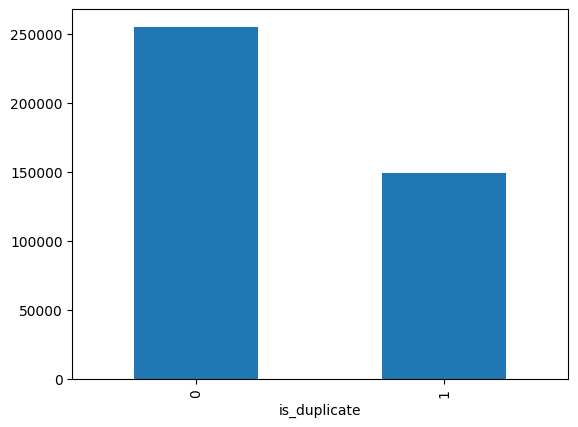

In [9]:
#distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated Questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('NUmber of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

NUmber of unique questions 537933
Number of questions getting repeated 111780


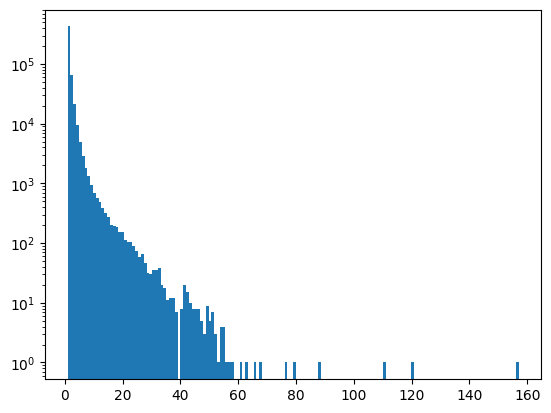

In [11]:
# repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [12]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
25001,Why are all Trump supporters ignorant?,Are all Trump supporters ignorant?
45980,If you were looking for companies who have a n...,How did you stop masturbating and started look...
267988,What is the best way to turn off my iPod touch?,How can I turn off my iPod Touch?
317893,I am 24 year old and want to make cricket my c...,I am 26 year old and want to make cricket my c...
201709,Why is Tom Arnold's sister known as the Queen ...,Is Meth really that bad?


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [14]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [15]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [16]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
25001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45980,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
267988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
317893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7473333333333333

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df.head()

In [21]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words
25001,25001,46637,46638,Why are all Trump supporters ignorant?,Are all Trump supporters ignorant?,0,6,5
45980,45980,82301,82302,If you were looking for companies who have a n...,How did you stop masturbating and started look...,0,21,19
267988,267988,290570,116451,What is the best way to turn off my iPod touch?,How can I turn off my iPod Touch?,1,11,8
317893,317893,443167,443168,I am 24 year old and want to make cricket my c...,I am 26 year old and want to make cricket my c...,1,21,21
201709,201709,303776,303777,Why is Tom Arnold's sister known as the Queen ...,Is Meth really that bad?,0,11,5


In [22]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [23]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,word_common
25001,25001,46637,46638,Why are all Trump supporters ignorant?,Are all Trump supporters ignorant?,0,6,5,5
45980,45980,82301,82302,If you were looking for companies who have a n...,How did you stop masturbating and started look...,0,21,19,8
267988,267988,290570,116451,What is the best way to turn off my iPod touch?,How can I turn off my iPod Touch?,1,11,8,5
317893,317893,443167,443168,I am 24 year old and want to make cricket my c...,I am 26 year old and want to make cricket my c...,1,21,21,18
201709,201709,303776,303777,Why is Tom Arnold's sister known as the Queen ...,Is Meth really that bad?,0,11,5,1


In [24]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [25]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,word_common,word_total
25001,25001,46637,46638,Why are all Trump supporters ignorant?,Are all Trump supporters ignorant?,0,6,5,5,11
45980,45980,82301,82302,If you were looking for companies who have a n...,How did you stop masturbating and started look...,0,21,19,8,35
267988,267988,290570,116451,What is the best way to turn off my iPod touch?,How can I turn off my iPod Touch?,1,11,8,5,19
317893,317893,443167,443168,I am 24 year old and want to make cricket my c...,I am 26 year old and want to make cricket my c...,1,21,21,18,38
201709,201709,303776,303777,Why is Tom Arnold's sister known as the Queen ...,Is Meth really that bad?,0,11,5,1,16


In [26]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,word_common,word_total,word_share
25001,25001,46637,46638,Why are all Trump supporters ignorant?,Are all Trump supporters ignorant?,0,6,5,5,11,0.45
45980,45980,82301,82302,If you were looking for companies who have a n...,How did you stop masturbating and started look...,0,21,19,8,35,0.23
267988,267988,290570,116451,What is the best way to turn off my iPod touch?,How can I turn off my iPod Touch?,1,11,8,5,19,0.26
317893,317893,443167,443168,I am 24 year old and want to make cricket my c...,I am 26 year old and want to make cricket my c...,1,21,21,18,38,0.47
201709,201709,303776,303777,Why is Tom Arnold's sister known as the Queen ...,Is Meth really that bad?,0,11,5,1,16,0.06


minimum words 1
maximum words 63
average num of words 10


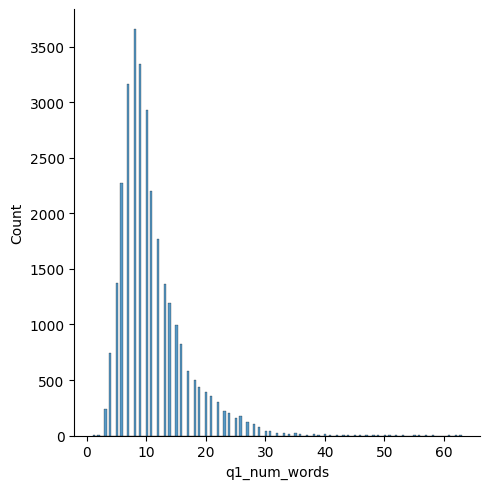

In [30]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


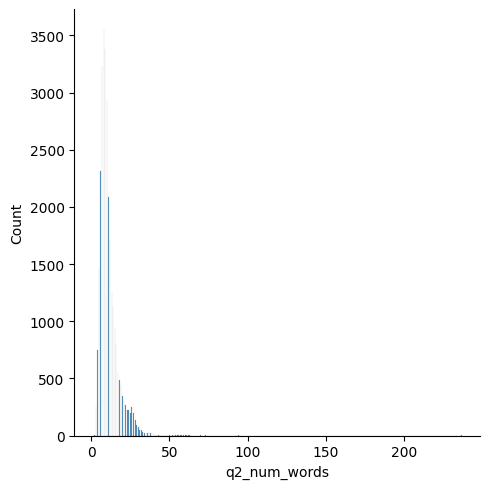

In [32]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

<ipython-input-33-7b7323be1ca9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
<ipython-input-33-7b7323be1ca9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='du

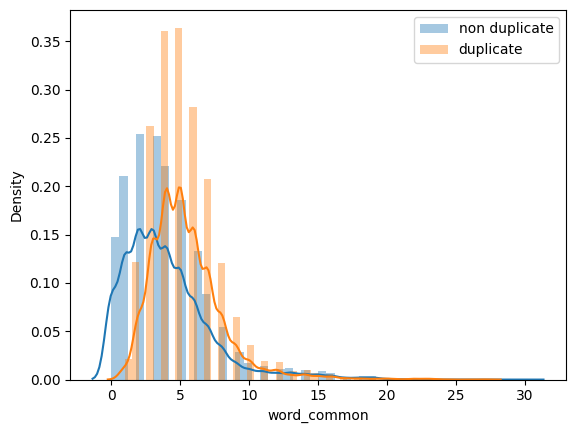

In [33]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-34-babee9c71a44>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
<ipython-input-34-babee9c71a44>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='dupl

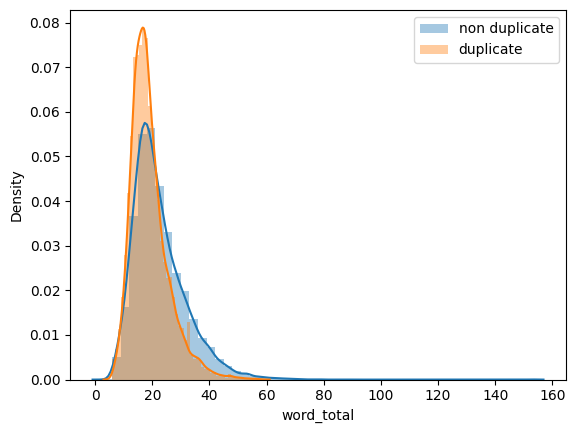

In [34]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-35-b7e81f19ad7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
<ipython-input-35-b7e81f19ad7c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='dupl

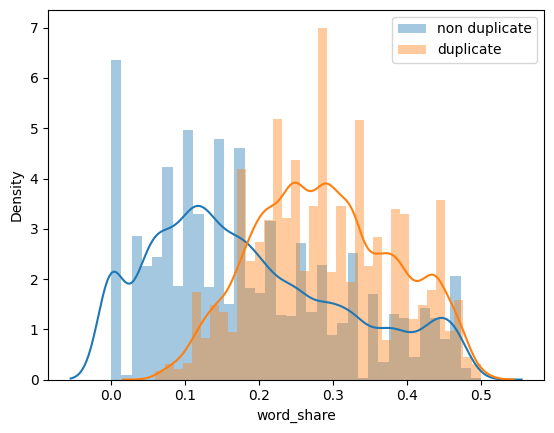

In [35]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [36]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
25001,Why are all Trump supporters ignorant?,Are all Trump supporters ignorant?
45980,If you were looking for companies who have a n...,How did you stop masturbating and started look...
267988,What is the best way to turn off my iPod touch?,How can I turn off my iPod Touch?
317893,I am 24 year old and want to make cricket my c...,I am 26 year old and want to make cricket my c...
201709,Why is Tom Arnold's sister known as the Queen ...,Is Meth really that bad?


In [37]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 6)


,is_duplicate,q1_num_words,q2_num_words,word_common,word_total,word_share
25001,0,6,5,5,11,0.45
45980,0,21,19,8,35,0.23
267988,1,11,8,5,19,0.26
317893,1,21,21,18,38,0.47
201709,0,11,5,1,16,0.06


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [39]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [40]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6006)


,is_duplicate,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,2,3,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
25001,0,6,5,5,11,0.45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45980,0,21,19,8,35,0.23,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
267988,1,11,8,5,19,0.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317893,1,21,21,18,38,0.47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201709,0,11,5,1,16,0.06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7748333333333334

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7683333333333333

Advanced Features
1. Token Features
cwc_min: This is the ratio of the number of common words to the length of the smaller question
cwc_max: This is the ratio of the number of common words to the length of the larger question
csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
2. Length Based Features
mean_len: Mean of the length of the two questions (number of words)
abs_len_diff: Absolute difference between the length of the two questions (number of words)
longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
3. Fuzzy Features
fuzz_ratio: fuzz_ratio score from fuzzywuzzy
fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
token_sort_ratio: token_sort_ratio from fuzzywuzzy
token_set_ratio: token_set_ratio from fuzzywuzzy

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('train.csv')

In [46]:
new_df = df.sample(30000,random_state=2)

In [47]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [48]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [49]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [50]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [51]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [52]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [53]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9


In [55]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [56]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3


In [57]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [58]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13


In [59]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24,0.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38,0.11
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34,0.03
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23
